In [406]:
import pandas as pd
File = pd.read_csv("Titanic.csv")
Titanic = pd.DataFrame(File)
Titanic.drop(columns = ["Unnamed: 0", "embarked", "deck", "embark_town", "alive"], axis=1, inplace = True)
Titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'adult_male', 'alone'],
      dtype='object')

In [408]:
Titanic_ind = Titanic.drop(columns = "survived", axis=1)
Survival = Titanic["survived"]
Titanic_ind.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'alone'],
      dtype='object')

In [410]:
#skimming the dataframe information
Titanic_ind.info()
#Only age factor has a missing variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   sex         891 non-null    object 
 2   age         714 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   class       891 non-null    object 
 7   who         891 non-null    object 
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(3)
memory usage: 57.6+ KB


In [412]:
Titanic_ind.isna().value_counts()
#one age seems to have a missing value

pclass  sex    age    sibsp  parch  fare   class  who    adult_male  alone
False   False  False  False  False  False  False  False  False       False    714
               True   False  False  False  False  False  False       False    177
Name: count, dtype: int64

In [414]:
Survival.info()
#no null on our target class

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [416]:
print(Survival.value_counts())
#thats a good balance 

survived
0    549
1    342
Name: count, dtype: int64


In [418]:
#Now splitting the datasets into train and test batches
from sklearn.model_selection import train_test_split
x_value = Titanic_ind
y_value = Survival

x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.2, stratify = y_value)
print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])

712 179 712 179


In [420]:
Titanic_ind.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   sex         891 non-null    object 
 2   age         714 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   class       891 non-null    object 
 7   who         891 non-null    object 
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(3)
memory usage: 57.6+ KB


In [422]:
import numpy as np
x_train["age"] = x_train["age"].replace(np.nan, x_train["age"].median())
x_train["age"].info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 384 to 211
Series name: age
Non-Null Count  Dtype  
--------------  -----  
712 non-null    float64
dtypes: float64(1)
memory usage: 11.1 KB


In [424]:
x_test["age"] = x_test["age"].replace(np.nan, x_test["age"].median())
x_test["age"].info()

<class 'pandas.core.series.Series'>
Index: 179 entries, 831 to 527
Series name: age
Non-Null Count  Dtype  
--------------  -----  
179 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [426]:
#Breaking the data into numeric and categorical type for suitable preprocessing
x_train_numeric = x_train.select_dtypes(include = ["int64", "float64"])
x_test_numeric = x_test.select_dtypes(include = ["int64", "float64"])
x_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 384 to 211
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  712 non-null    int64  
 1   age     712 non-null    float64
 2   sibsp   712 non-null    int64  
 3   parch   712 non-null    int64  
 4   fare    712 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


In [428]:
#so now standardizing the numeric variables through z-score method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_numeric_scaled = scaler.fit_transform(x_train_numeric)
x_test_numeric_scaled = scaler.fit_transform(x_test_numeric)
x_train_numeric_scaled[0:5]

array([[ 0.84268285, -0.13084368, -0.47908333, -0.47952835, -0.50820917],
       [-1.52881987,  1.48409965,  0.44282838,  0.76654532,  1.60948922],
       [-1.52881987,  1.86860996, -0.47908333, -0.47952835,  0.39586375],
       [ 0.84268285,  0.79198108,  0.44282838,  0.76654532, -0.35184648],
       [-0.34306851,  0.48437283,  0.44282838, -0.47952835, -0.13593841]])

In [430]:
columns = x_train_numeric.columns.to_list()
x_train_numeric_scaled_df = pd.DataFrame(x_train_numeric_scaled)
x_train_numeric_scaled_df.columns = columns

x_test_numeric_scaled_df = pd.DataFrame(x_test_numeric_scaled)
x_test_numeric_scaled_df.columns = columns
x_test_numeric_scaled_df.head()

,pclass,age,sibsp,parch,fare
0,-0.482176,-2.078034,0.396734,0.772091,-0.221036
1,-0.482176,1.097034,0.396734,-0.450956,-0.085648
2,-0.482176,2.253848,-0.458873,-0.450956,-0.375098
3,-1.733037,0.865672,-0.458873,-0.450956,-0.571178
4,-1.733037,1.366958,-0.458873,-0.450956,-0.038962


In [432]:
x_train_categorical = x_train.select_dtypes(include = ["object", "bool"])
x_test_categorical = x_test.select_dtypes(include = ["object", "bool"])
x_train_categorical.head()

,sex,class,who,adult_male,alone
384,male,Third,man,True,True
698,male,First,man,True,False
6,male,First,man,True,True
188,male,Third,man,True,False
518,female,Second,woman,False,False


In [450]:
#now for the categorical variable
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, drop = "first", handle_unknown = "ignore")  
encoded = encoder.fit_transform(x_train_categorical)
x_train_categorical_encoded = pd.DataFrame(encoded)

encoder = OneHotEncoder(sparse_output = False, drop = "first", handle_unknown = "ignore")  
encoded = encoder.fit_transform(x_test_categorical)
x_test_categorical_encoded = pd.DataFrame(encoded)

In [462]:
x_train_categorical_encoded.head()

,0,1,2,3,4,5,6
0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [438]:
print(x_train_categorical["sex"].unique())
print(x_train_categorical["class"].unique())
print(x_train_categorical["who"].unique())
print(x_train_categorical["adult_male"].unique())
print(x_train_categorical["alone"].unique())

['male' 'female']
['Third' 'First' 'Second']
['man' 'woman' 'child']
[ True False]
[ True False]


In [468]:
#Now concating the two columns
columns = ["sex_1", "class_1", "class_2", "who_1", "who_2", "adult_male_1", "alone_1"]
x_train_categorical_encoded.columns = columns
x_test_categorical_encoded.columns = columns
print(x_train_categorical_encoded.shape)
print(x_test_categorical_encoded.shape)

(712, 7)
(179, 7)


In [480]:
x_train_transformed = pd.concat([x_train_numeric_scaled_df, x_train_categorical_encoded], axis = 1)
x_train_transformed.head()

,pclass,age,sibsp,parch,fare,sex_1,class_1,class_2,who_1,who_2,adult_male_1,alone_1
0,0.842683,-0.130844,-0.479083,-0.479528,-0.508209,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,-1.528820,1.484100,0.442828,0.766545,1.609489,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.528820,1.868610,-0.479083,-0.479528,0.395864,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.842683,0.791981,0.442828,0.766545,-0.351846,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.343069,0.484373,0.442828,-0.479528,-0.135938,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [474]:
x_test_transformed = pd.concat([x_test_numeric_scaled_df, x_test_categorical_encoded], axis = 1)
x_test_transformed.head()

,pclass,age,sibsp,parch,fare,sex_1,class_1,class_2,who_1,who_2,adult_male_1,alone_1
0,-0.482176,-2.078034,0.396734,0.772091,-0.221036,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.482176,1.097034,0.396734,-0.450956,-0.085648,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.482176,2.253848,-0.458873,-0.450956,-0.375098,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-1.733037,0.865672,-0.458873,-0.450956,-0.571178,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,-1.733037,1.366958,-0.458873,-0.450956,-0.038962,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [486]:
print(y_train.shape)
print(y_test.shape)

(712,)
(179,)


In [541]:
#Now conducting random forest to check the strengths of variables in surivival classification
param_grid = {"n_estimators": [50, 100], 
              "max_features": [4, 5], 
              "max_depth":[None, 10, 20]}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

RF = RandomForestClassifier()
CV = StratifiedKFold(n_splits = 4)

Grid = GridSearchCV(RF, param_grid, cv = CV)
Grid.fit(x_train_transformed, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20], 'max_features': [4, 5],
                         'n_estimators': [50, 100]})

In [573]:
y_test_hat = Grid.predict(x_test_transformed)

In [575]:
Grid.score(x_test_transformed, y_test)

0.8212290502793296

In [581]:
from sklearn.metrics import classification_report
print(classification_report(y_test_hat, y_test))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       124
           1       0.67      0.84      0.74        55

    accuracy                           0.82       179
   macro avg       0.79      0.83      0.80       179
weighted avg       0.84      0.82      0.83       179



<Axes: >

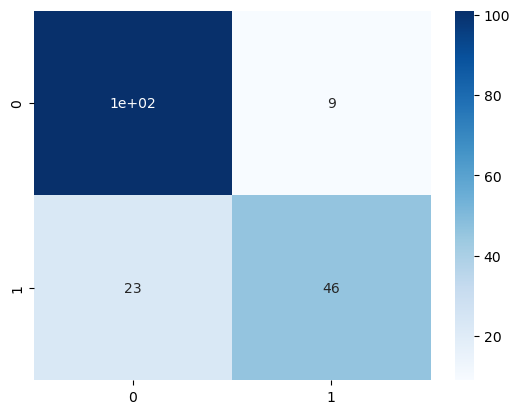

In [619]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrx = confusion_matrix(y_test, y_test_hat)
sns.heatmap(conf_matrx, annot = True, cmap = "Blues")

In [689]:
Feature_importance = Grid.best_estimator_.feature_importances_
Columns = x_train_transformed.columns.to_list()
Feature_Importance = pd.DataFrame(Feature_importance)
Columns = pd.DataFrame(Columns)

Feat_importance = pd.concat([Columns, Feature_Importance], axis=1)
Feat_importance.columns = ["Features", "Importance"]
Feat_importance.set_index("Features", inplace=True)
sorted_imp = Feat_importance.sort_values(by = "Importance")

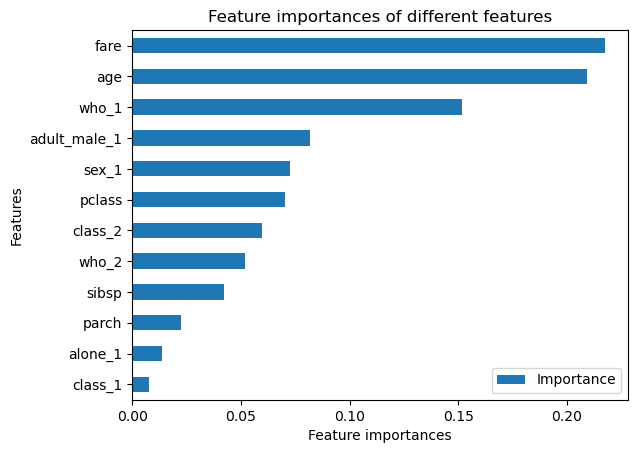

In [713]:
import matplotlib.pyplot as plt
sorted_imp.plot(kind="barh")
plt.title("Feature importances of different features")
plt.xlabel("Feature importances")
plt.ylabel("Features")
plt.show()